In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [68]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

In [69]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)

(60000, 28, 28)


In [70]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4331 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0558 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9933: 0s - loss: 0.0212 
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 4s 2m

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print("Précision : ", test_acc)

313/313 - 0s - loss: 0.0845 - accuracy: 0.9770
Précision :  0.9769999980926514


In [75]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

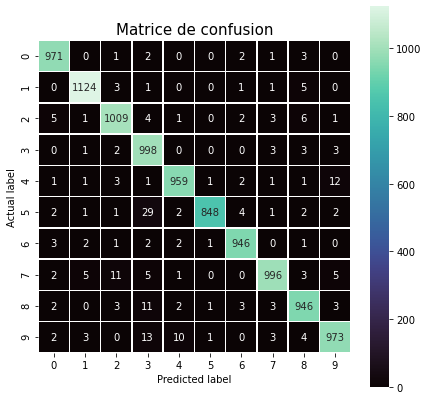

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrice_confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7,7))
sns.heatmap(matrice_confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

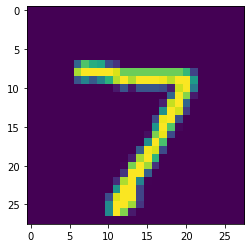

In [77]:
plt.imshow(X_test[0])

In [78]:
print('Prédiction pour la première image des données test : ', predictions[0])

Prédiction pour la première image des données test :  7


**Enregistrement du modèle**

In [79]:
model.save('reco_chiffre')

INFO:tensorflow:Assets written to: reco_chiffre\assets
